In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations (latitude is HORIZONTAL, longitude is VERTIVCAL)
lats = np.random.uniform(low=-90.000, high=90.000, size=300)
lngs = np.random.uniform(low=-180.000, high=180.000, size=300)
#lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
#lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#zipping together both lat and long to give a set of coordinates to look up nearest city
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
# searching for the nearest city in a random way based on lat and lng 
for lat_lng in lat_lngs:
    #what do the 0,1 refer to in this instance? these are the first indexes of lat & lng
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list What does this line mean? Ask for breakdown
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

189

In [6]:
#Need to build query url in order to request at least 500 city lookups based on random list of coordinates
#(need to use loop in order to do this?)
lat_list = []
lng_list = []
city_list = []
maxtemp_list = []
cloud_list = []
wind_list = []
humidity_list = []

count = 0 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric" 

query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

#make new dataframe for information retrieved

# do this line at the end city_weather_df = pd.DataFrame(columns = ["City","Country","Lat","Lng","Date","Max Temp", "Wind Speed", 
                                          # "Cloudiness" , "Humidity"])
for city in cities: 
    print(city)
    
    try: 
        response = requests.get(query_url + city).json()
        print(response)
        #lat_value = response(["coord"]["lat"])
        #print(lat_value)
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        city_list.append(response["name"])
        maxtemp_list.append(response["main"]["temp_max"])
        cloud_list.append(response["clouds"]["all"])
        wind_list.append(response["wind"]["speed"])
        humidity_list.append(response["main"]["humidity"])
        count = count + 1
        print(len(lat_list))
        print(len(lng_list))
        print(len(city_list))
        print(len(maxtemp_list))
        print(len(cloud_list))
        print(len(wind_list))
        print(len(humidity_list))
        
        
    except: 
        print("Error retrieving city weather" + city)
        pass

print(len(lat_list))
print(len(lng_list))
print(len(city_list))
print(len(maxtemp_list))
print(len(cloud_list))
print(len(wind_list))
print(len(humidity_list))



http://api.openweathermap.org/data/2.5/weather?appid=df75ba845511ccd0e823e76f17dfed0f&units=metric&q=
broken hill
{'coord': {'lon': 141.45, 'lat': -31.97}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 19, 'pressure': 1011, 'humidity': 45, 'temp_min': 19, 'temp_max': 19}, 'visibility': 10000, 'wind': {'speed': 0.5, 'deg': 30}, 'clouds': {'all': 12}, 'dt': 1553788800, 'sys': {'type': 1, 'id': 9491, 'message': 0.0049, 'country': 'AU', 'sunrise': 1553805776, 'sunset': 1553848513}, 'id': 2173911, 'name': 'Broken Hill', 'cod': 200}
1
1
1
1
1
1
1
ushuaia
{'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 9.15, 'pressure': 1005, 'humidity': 70, 'temp_min': 8, 'temp_max': 10}, 'visibility': 10000, 'wind': {'speed': 8.26, 'deg': 309.503}, 'clouds': {'all': 0}, 'dt': 1553788800, 'sys': {'type': 1, 'id': 83

{'coord': {'lon': -25.43, 'lat': 37.72}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 14.36, 'pressure': 1025, 'humidity': 67, 'temp_min': 12.78, 'temp_max': 16}, 'visibility': 10000, 'wind': {'speed': 8.2, 'deg': 30}, 'clouds': {'all': 20}, 'dt': 1553792844, 'sys': {'type': 1, 'id': 6899, 'message': 0.0039, 'country': 'PT', 'sunrise': 1553758414, 'sunset': 1553803198}, 'id': 3372472, 'name': 'Vila Franca do Campo', 'cod': 200}
18
18
18
18
18
18
18
barrow
{'coord': {'lon': -60.23, 'lat': -38.31}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 24.88, 'pressure': 1022.52, 'humidity': 44, 'temp_min': 24.88, 'temp_max': 24.88, 'sea_level': 1022.52, 'grnd_level': 1010.73}, 'wind': {'speed': 7.81, 'deg': 342.003}, 'clouds': {'all': 0}, 'dt': 1553792864, 'sys': {'message': 0.004, 'country': 'AR', 'sunrise': 1553767860, 'sunset': 1553810452

{'coord': {'lon': 134.5, 'lat': 33.93}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 9.13, 'pressure': 1015, 'humidity': 61, 'temp_min': 8.33, 'temp_max': 10}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 360}, 'clouds': {'all': 75}, 'dt': 1553792669, 'sys': {'type': 1, 'id': 8027, 'message': 0.0043, 'country': 'JP', 'sunrise': 1553806467, 'sunset': 1553851158}, 'id': 1865309, 'name': 'Katsuura', 'cod': 200}
34
34
34
34
34
34
34
hobart
{'coord': {'lon': 147.33, 'lat': -42.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 15.92, 'pressure': 1006, 'humidity': 63, 'temp_min': 15, 'temp_max': 17}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 360}, 'clouds': {'all': 0}, 'dt': 1553792654, 'sys': {'type': 1, 'id': 9545, 'message': 0.0063, 'country': 'AU', 'sunrise': 1553804555, 'sunset': 1553846913}, 'id': 2163355, 'name':

{'coord': {'lon': 36.99, 'lat': -16.84}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 21.63, 'pressure': 1014.56, 'humidity': 85, 'temp_min': 21.63, 'temp_max': 21.63, 'sea_level': 1014.56, 'grnd_level': 995.13}, 'wind': {'speed': 2.31, 'deg': 180.003}, 'clouds': {'all': 0}, 'dt': 1553793297, 'sys': {'message': 0.0045, 'country': 'MZ', 'sunrise': 1553744226, 'sunset': 1553787431}, 'id': 1024312, 'name': 'Mocuba', 'cod': 200}
49
49
49
49
49
49
49
mahon
{'coord': {'lon': -8.4, 'lat': 51.89}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 11, 'pressure': 1033, 'humidity': 76, 'temp_min': 11, 'temp_max': 11}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 210}, 'clouds': {'all': 20}, 'dt': 1553790600, 'sys': {'type': 1, 'id': 1563, 'message': 0.0038, 'country': 'IE', 'sunrise': 1553753911, 'sunset': 1553799529}, 'id': 2965139, 'name

{'coord': {'lon': -61.45, 'lat': 10.24}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 30.55, 'pressure': 1014, 'humidity': 59, 'temp_min': 29.44, 'temp_max': 32}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 120}, 'clouds': {'all': 40}, 'dt': 1553792485, 'sys': {'type': 1, 'id': 8810, 'message': 0.0051, 'country': 'TT', 'sunrise': 1553767518, 'sunset': 1553811379}, 'id': 3573739, 'name': 'Esperance', 'cod': 200}
66
66
66
66
66
66
66
mataura
{'coord': {'lon': 168.86, 'lat': -46.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 2.98, 'pressure': 1027.72, 'humidity': 85, 'temp_min': 2.98, 'temp_max': 2.98, 'sea_level': 1027.72, 'grnd_level': 1012.41}, 'wind': {'speed': 1.21, 'deg': 355.503}, 'clouds': {'all': 8}, 'dt': 1553793302, 'sys': {'message': 0.0038, 'country': 'NZ', 'sunrise': 1553799452, 'sunset': 1553841683}, 'i

{'coord': {'lon': -2.24, 'lat': 4.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 29.13, 'pressure': 1010.04, 'humidity': 93, 'temp_min': 29.13, 'temp_max': 29.13, 'sea_level': 1010.04, 'grnd_level': 1007.85}, 'wind': {'speed': 4.41, 'deg': 173.503}, 'clouds': {'all': 0}, 'dt': 1553792881, 'sys': {'message': 0.0041, 'country': 'GH', 'sunrise': 1553753382, 'sunset': 1553797101}, 'id': 2303611, 'name': 'Axim', 'cod': 200}
82
82
82
82
82
82
82
bengkulu
{'cod': '404', 'message': 'city not found'}
Error retrieving city weatherbengkulu
sao joao da barra
{'coord': {'lon': -41.05, 'lat': -21.64}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 29, 'pressure': 1019, 'humidity': 51, 'temp_min': 29, 'temp_max': 29}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 100}, 'clouds': {'all': 40}, 'dt': 1553788800, 'sys': {'type': 1, 'id':

{'coord': {'lon': 147.9, 'lat': 70.62}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -11.78, 'pressure': 1016.16, 'humidity': 78, 'temp_min': -11.78, 'temp_max': -11.78, 'sea_level': 1016.16, 'grnd_level': 1014.01}, 'wind': {'speed': 7.06, 'deg': 252.503}, 'clouds': {'all': 88}, 'dt': 1553793310, 'sys': {'message': 0.0039, 'country': 'RU', 'sunrise': 1553801255, 'sunset': 1553849939}, 'id': 2126123, 'name': 'Chokurdakh', 'cod': 200}
98
98
98
98
98
98
98
helmsdale
{'coord': {'lon': -3.65, 'lat': 58.12}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 10.85, 'pressure': 1022, 'humidity': 76, 'temp_min': 10, 'temp_max': 11.67}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 220}, 'clouds': {'all': 20}, 'dt': 1553792883, 'sys': {'type': 1, 'id': 1439, 'message': 0.0047, 'country': 'GB', 'sunrise': 1553752486, 'sunset': 1553798

{'coord': {'lon': 161.3, 'lat': 68.75}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -23.38, 'pressure': 1020.32, 'humidity': 70, 'temp_min': -23.38, 'temp_max': -23.38, 'sea_level': 1020.32, 'grnd_level': 1011.61}, 'wind': {'speed': 1.96, 'deg': 162.003}, 'clouds': {'all': 36}, 'dt': 1553793316, 'sys': {'message': 0.0039, 'country': 'RU', 'sunrise': 1553798307, 'sunset': 1553846457}, 'id': 2126199, 'name': 'Cherskiy', 'cod': 200}
113
113
113
113
113
113
113
makakilo city
{'coord': {'lon': -158.09, 'lat': 21.35}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 18.5, 'pressure': 1014, 'humidity': 88, 'temp_min': 16, 'temp_max': 20.56}, 'visibility': 16093, 'wind': {'speed': 2.1, 'deg': 40}, 'clouds': {'all': 40}, 'dt': 1553793191, 'sys': {'type': 1, 'id': 7868, 'message': 0.0046, 'country': 'US', 'sunrise': 1553790537, '

{'coord': {'lon': -68.59, 'lat': 70.47}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': -19, 'pressure': 1007, 'humidity': 84, 'temp_min': -19, 'temp_max': -19}, 'visibility': 40233, 'wind': {'speed': 2.1, 'deg': 290}, 'clouds': {'all': 75}, 'dt': 1553788800, 'sys': {'type': 1, 'id': 776, 'message': 0.007, 'country': 'CA', 'sunrise': 1553766950, 'sunset': 1553815374}, 'id': 5924351, 'name': 'Clyde River', 'cod': 200}
128
128
128
128
128
128
128
illoqqortoormiut
{'cod': '404', 'message': 'city not found'}
Error retrieving city weatherilloqqortoormiut
lorengau
{'coord': {'lon': 147.27, 'lat': -2.02}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.43, 'pressure': 1006.44, 'humidity': 97, 'temp_min': 28.43, 'temp_max': 28.43, 'sea_level': 1006.44, 'grnd_level': 1004.25}, 'wind': {'speed': 3.56, 'deg': 334.503}, 'clouds': {'all': 64

{'coord': {'lon': -50.22, 'lat': -30.17}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 24.08, 'pressure': 1024.88, 'humidity': 74, 'temp_min': 24.08, 'temp_max': 24.08, 'sea_level': 1024.88, 'grnd_level': 1015.05}, 'wind': {'speed': 7.81, 'deg': 69.5035}, 'clouds': {'all': 24}, 'dt': 1553793325, 'sys': {'message': 0.0031, 'country': 'BR', 'sunrise': 1553765333, 'sunset': 1553808176}, 'id': 3466165, 'name': 'Cidreira', 'cod': 200}
143
143
143
143
143
143
143
saint-augustin
{'coord': {'lon': -0.61, 'lat': 44.83}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 18.01, 'pressure': 1027, 'humidity': 34, 'temp_min': 17.22, 'temp_max': 19}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1553793044, 'sys': {'type': 1, 'id': 6450, 'message': 0.0043, 'country': 'FR', 'sunrise': 1553752281, 'sunset': 1553797

{'coord': {'lon': -51.1, 'lat': 69.22}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -13, 'pressure': 1011, 'humidity': 65, 'temp_min': -13, 'temp_max': -13}, 'visibility': 10000, 'wind': {'speed': 8.7, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1553791800, 'sys': {'type': 1, 'id': 165, 'message': 0.0052, 'country': 'GL', 'sunrise': 1553762934, 'sunset': 1553810997}, 'id': 3423146, 'name': 'Ilulissat', 'cod': 200}
158
158
158
158
158
158
158
vaitupu
{'cod': '404', 'message': 'city not found'}
Error retrieving city weathervaitupu
ibra
{'coord': {'lon': 58.55, 'lat': 22.69}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.68, 'pressure': 1016.2, 'humidity': 68, 'temp_min': 21.68, 'temp_max': 21.68, 'sea_level': 1016.2, 'grnd_level': 941.05}, 'wind': {'speed': 1.41, 'deg': 33.0035}, 'clouds': {'all': 88}, 'dt': 1553792905, '

In [10]:
city_weather_df = pd.DataFrame({"City": city_list,"Lattitude": lat_list,"Longitude": lng_list,"Max Temp": maxtemp_list
                                , "Wind Speed": wind_list, "Cloudiness": cloud_list, "Humidity": humidity_list})

city_weather_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 7 columns):
City          172 non-null object
Lattitude     172 non-null float64
Longitude     172 non-null float64
Max Temp      172 non-null float64
Wind Speed    172 non-null float64
Cloudiness    172 non-null int64
Humidity      172 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 9.5+ KB


In [11]:
city_weather_df.head(15)


,City,Lattitude,Longitude,Max Temp,Wind Speed,Cloudiness,Humidity
0,Broken Hill,-31.97,141.45,19.00,0.50,12,45
1,Ushuaia,-54.81,-68.31,10.00,8.26,0,70
2,Upernavik,72.79,-56.15,-12.73,4.91,68,100
3,Atuona,-9.80,-139.03,27.83,7.06,0,100
4,Ha Tinh,18.33,105.90,24.83,6.56,56,96
5,Butaritari,3.07,172.79,27.58,3.86,92,100
6,Greensburg,30.83,-90.67,22.78,4.60,1,43
7,Aklavik,68.22,-135.01,-1.00,1.86,40,92
8,Chuy,-33.69,-53.46,23.13,7.06,0,77
9,Punta Arenas,-53.16,-70.91,15.00,6.70,75,58


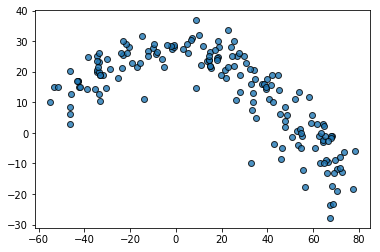

In [13]:
plt.scatter(city_weather_df["Lattitude"],city_weather_df["Max Temp"],
           
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.show()